DATA

In [ ]:
import pandas as pd
import csv
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Temp Tugas/jamb_exam_results.csv")
print(data.head)

Mounted at /content/drive
<bound method NDFrame.head of       JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
0            192                    22               78                4   
1            207                    14               88                4   
2            182                    29               87                2   
3            210                    29               99                2   
4            199                    12               98                3   
...          ...                   ...              ...              ...   
4995         183                    20               74                2   
4996         179                     0               80                2   
4997         261                    17               89                3   
4998         183                    15               96                2   
4999         218                    34              100                1   

      Distance_To_School School

COUNT DATA

In [ ]:
import pandas as pd
import csv
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Temp Tugas/jamb_exam_results.csv")

frekuensi1 = data['Gender'].value_counts()
print(frekuensi1)

frekuensi2 = data['Parent_Involvement'].value_counts()
print(frekuensi2)

frekuensi3 = data['Socioeconomic_Status'].value_counts()
print(frekuensi3)

frekuensi4 = data['Parent_Education_Level'].value_counts()
print(frekuensi4)

print()

# Melihat jumlah data yang hilang di kolom Parent_Education_Level
missing = data['Gender'].isnull().sum()
print(f"Jumlah data yang hilang di Gender: {missing}")
missing = data['Parent_Involvement'].isnull().sum()
print(f"Jumlah data yang hilang di Parent_Involvement: {missing}")
missing = data['Socioeconomic_Status'].isnull().sum()
print(f"Jumlah data yang hilang di Socioeconomic_Status: {missing}")
missing = data['Parent_Education_Level'].isnull().sum()
print(f"Jumlah data yang hilang di Parent_Education_Level: {missing}")

print()

# missing value handling
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

mean_scores1 = data.groupby("Parent_Education_Level")["JAMB_Score"].mean()
mean_scores2 = data.groupby("Socioeconomic_Status")["JAMB_Score"].mean()
mean_scores3 = data.groupby("Parent_Involvement")["JAMB_Score"].mean()
mean_scores4 = data.groupby("Gender")["JAMB_Score"].mean()

print(mean_scores4)
print(mean_scores3)
print(mean_scores2)
print(mean_scores1)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Gender
Female    2530
Male      2470
Name: count, dtype: int64
Parent_Involvement
Medium    2012
Low       1877
High      1111
Name: count, dtype: int64
Socioeconomic_Status
Medium    1967
Low       1951
High      1082
Name: count, dtype: int64
Parent_Education_Level
Secondary    1556
Primary      1335
Tertiary     1218
Name: count, dtype: int64

Jumlah data yang hilang di Gender: 0
Jumlah data yang hilang di Parent_Involvement: 0
Jumlah data yang hilang di Socioeconomic_Status: 0
Jumlah data yang hilang di Parent_Education_Level: 891

Gender
Female    174.763241
Male      173.369231
Name: JAMB_Score, dtype: float64
Parent_Involvement
High      188.826283
Low       167.253063
Medium    172.292744
Name: JAMB_Score, dtype: float64
Socioeconomic_Status
High      190.744917
Low       164.772424
Medium    174.131164
Name: JAMB_Score, dtype: float64
Parent_Educatio

ANOVA

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from google.colab import drive
drive.mount('/content/drive')

# Membaca data
data = pd.read_csv("/content/drive/My Drive/Temp Tugas/jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')


# Mengonversi kolom tertentu menjadi tipe data kategori
categorical_columns = ['Gender', 'Parent_Involvement', 'Socioeconomic_Status', 'Parent_Education_Level']
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Uji ANOVA untuk setiap variabel independen terhadap JAMB_Score
# Variabel 1: Gender
groups_gender = [data['JAMB_Score'][data['Gender'] == cat] for cat in data['Gender'].cat.categories]
f_stat_gender, p_value_gender = f_oneway(*groups_gender)

# Variabel 2: Parent_Involvement
groups_parent = [data['JAMB_Score'][data['Parent_Involvement'] == cat] for cat in data['Parent_Involvement'].cat.categories]
f_stat_parent, p_value_parent = f_oneway(*groups_parent)

# Variabel 3: Socioeconomic_Status
groups_socio = [data['JAMB_Score'][data['Socioeconomic_Status'] == cat] for cat in data['Socioeconomic_Status'].cat.categories]
f_stat_socio, p_value_socio = f_oneway(*groups_socio)

# Variabel 4: Parent_Education_Level
groups_edu = [data['JAMB_Score'][data['Parent_Education_Level'] == cat] for cat in data['Parent_Education_Level'].cat.categories]
f_stat_edu, p_value_edu = f_oneway(*groups_edu)

# Menampilkan hasil
print(f"Gender: F={f_stat_gender}, p={p_value_gender}")
print(f"Parent Involvement: F={f_stat_parent}, p={p_value_parent}")
print(f"Socioeconomic Status: F={f_stat_socio}, p={p_value_socio}")
print(f"Parent Education Level: F={f_stat_edu}, p={p_value_edu}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Gender: F=1.0712013729757428, p=0.3007243155873339
Parent Involvement: F=76.21163905525485, p=2.491538848117176e-33
Socioeconomic Status: F=107.97024426459544, p=1.2416986871835047e-46
Parent Education Level: F=45.12716223949831, p=9.092668681182732e-29


HEATMAP

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


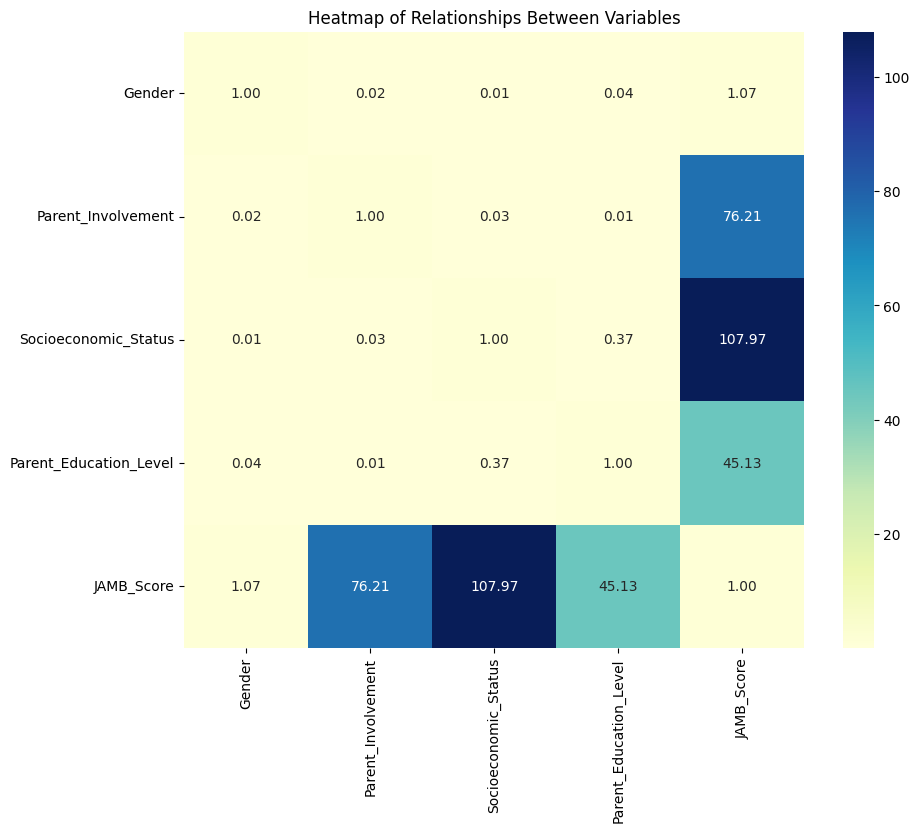

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, pearsonr, chi2_contingency
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

# Load your dataset
data = pd.read_csv("/content/drive/My Drive/Temp Tugas/jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Helper function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# List of variables to analyze
variables = ['Gender', 'Parent_Involvement', 'Socioeconomic_Status',
             'Parent_Education_Level', 'JAMB_Score']

# Initialize an empty matrix for the heatmap
heatmap_matrix = np.zeros((len(variables), len(variables)))

# Calculate pairwise relationships
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i == j:  # Perfect correlation with itself
            heatmap_matrix[i, j] = 1.0
        elif var1 == 'JAMB_Score' or var2 == 'JAMB_Score':  # Numerical vs. Categorical
            if var1 == 'JAMB_Score':  # JAMB_Score vs Categorical
                groups = [data[data[var2] == level]['JAMB_Score']
                          for level in data[var2].unique()]
            else:  # Categorical vs JAMB_Score
                groups = [data[data[var1] == level]['JAMB_Score']
                          for level in data[var1].unique()]
            f_stat, _ = f_oneway(*groups)
            heatmap_matrix[i, j] = f_stat
        elif data[var1].dtype == 'object' and data[var2].dtype == 'object':  # Categorical vs Categorical
            heatmap_matrix[i, j] = cramers_v(data[var1], data[var2])
        elif data[var1].dtype != 'object' and data[var2].dtype != 'object':  # Numerical vs Numerical
            corr, _ = pearsonr(data[var1], data[var2])
            heatmap_matrix[i, j] = corr

# Convert matrix to DataFrame for better labeling
heatmap_df = pd.DataFrame(heatmap_matrix, index=variables, columns=variables)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Heatmap of Relationships Between Variables")
plt.show()


BOXPLOT TIAP KATEGORI

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  500

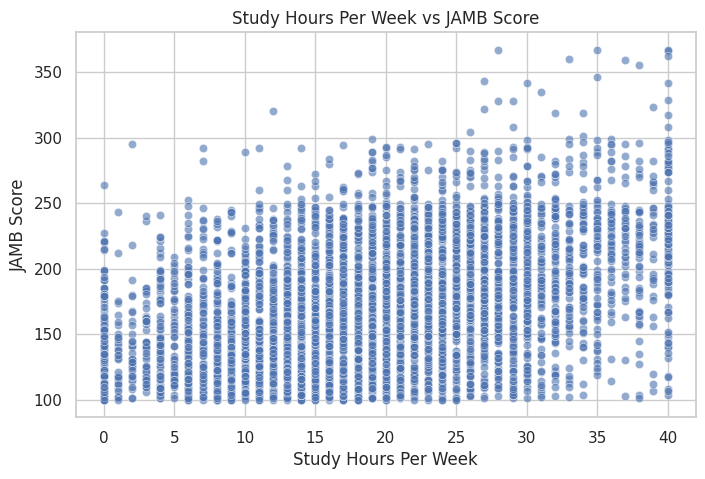

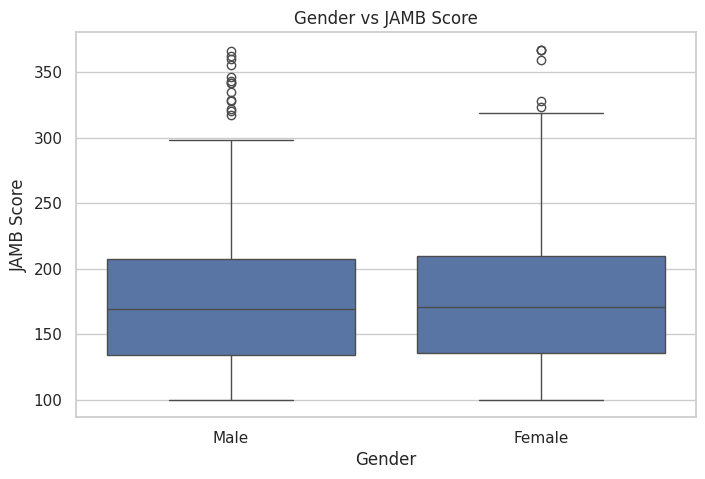

<ipython-input-5-cd2874b0d30f>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parent_Involvement', y='JAMB_Score', data=data, palette="coolwarm")


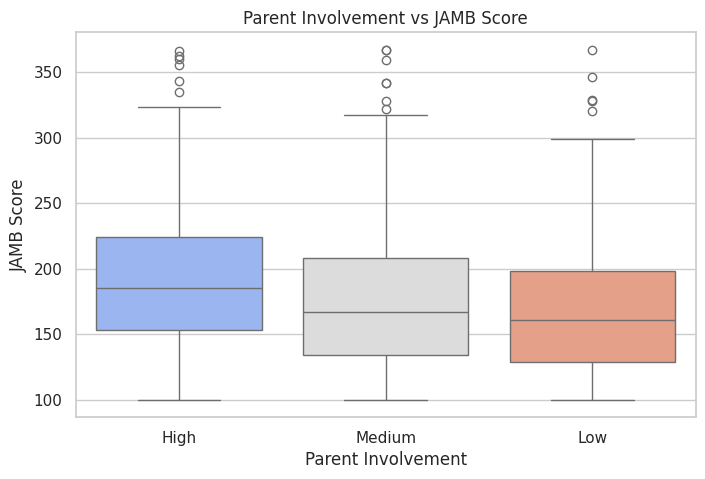

<ipython-input-5-cd2874b0d30f>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Socioeconomic_Status', y='JAMB_Score', data=data, palette="muted")


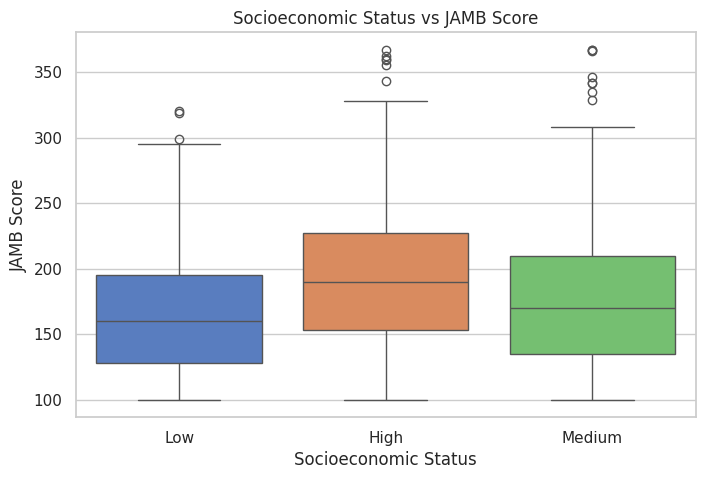

<ipython-input-5-cd2874b0d30f>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parent_Education_Level', y='JAMB_Score', data=data, palette="Set3")


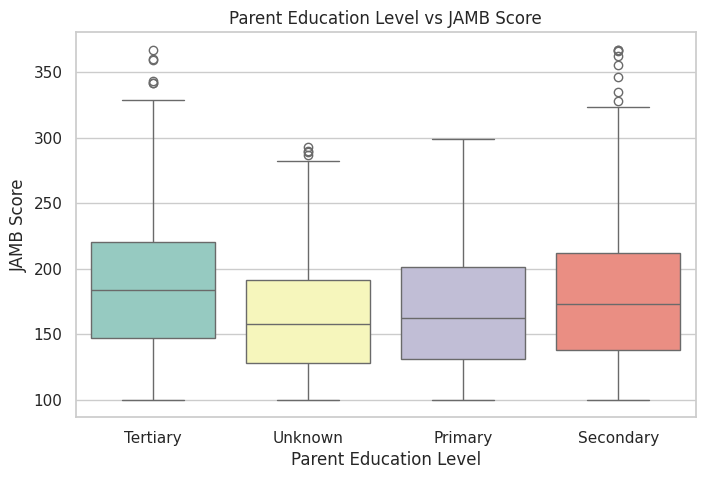

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/My Drive/Temp Tugas/jamb_exam_results.csv')
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Step 2: Explore data structure
print("Dataset Overview:")
print(data.info())
print(data.head())

# Step 3: Analyze correlations/associations
# Function to check correlation or association
def analyze_correlation(data):
    # Numeric: Correlation with Study Hours Per Week
    numeric_corr = pearsonr(data['Study_Hours_Per_Week'], data['JAMB_Score'])[0]

    # Categorical: Association using Chi-Square test
    gender_assoc = chi2_contingency(pd.crosstab(data['Gender'], data['JAMB_Score'] > data['JAMB_Score'].median()))[1]
    parent_involvement_assoc = chi2_contingency(pd.crosstab(data['Parent_Involvement'], data['JAMB_Score'] > data['JAMB_Score'].median()))[1]
    socioeconomic_assoc = chi2_contingency(pd.crosstab(data['Socioeconomic_Status'], data['JAMB_Score'] > data['JAMB_Score'].median()))[1]
    parent_education_assoc = chi2_contingency(pd.crosstab(data['Parent_Education_Level'], data['JAMB_Score'] > data['JAMB_Score'].median()))[1]

    return {
        "Numeric Correlation": numeric_corr,
        "Gender Association (p-value)": gender_assoc,
        "Parent Involvement Association (p-value)": parent_involvement_assoc,
        "Socioeconomic Status Association (p-value)": socioeconomic_assoc,
        "Parent Education Level Association (p-value)": parent_education_assoc,
    }

# Perform correlation/association analysis
correlation_results = analyze_correlation(data)
print("Correlation and Association Results:")
print(correlation_results)

# Step 4: Visualization
sns.set(style="whitegrid")

# Visualization 1: Study Hours vs JAMB Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Study_Hours_Per_Week', y='JAMB_Score', data=data, alpha=0.6)
plt.title("Study Hours Per Week vs JAMB Score")
plt.xlabel("Study Hours Per Week")
plt.ylabel("JAMB Score")
plt.show()

# Visualization 2: Gender vs JAMB Score Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='JAMB_Score', data=data)
plt.title("Gender vs JAMB Score")
plt.xlabel("Gender")
plt.ylabel("JAMB Score")
plt.show()

# Visualization 3: Parent Involvement vs JAMB Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Parent_Involvement', y='JAMB_Score', data=data, palette="coolwarm")
plt.title("Parent Involvement vs JAMB Score")
plt.xlabel("Parent Involvement")
plt.ylabel("JAMB Score")
plt.show()

# Visualization 4: Socioeconomic Status vs JAMB Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Socioeconomic_Status', y='JAMB_Score', data=data, palette="muted")
plt.title("Socioeconomic Status vs JAMB Score")
plt.xlabel("Socioeconomic Status")
plt.ylabel("JAMB Score")
plt.show()

# Visualization 5: Parent Education Level vs JAMB Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Parent_Education_Level', y='JAMB_Score', data=data, palette="Set3")
plt.title("Parent Education Level vs JAMB Score")
plt.xlabel("Parent Education Level")
plt.ylabel("JAMB Score")
plt.show()


GRAFIK GENDER

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-3b7cb7141811>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Gender", y="JAMB_Score", jitter=True, palette="viridis")


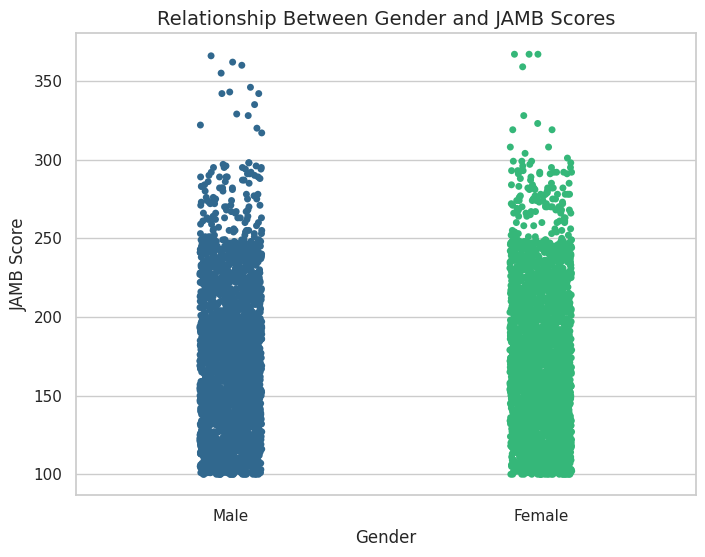

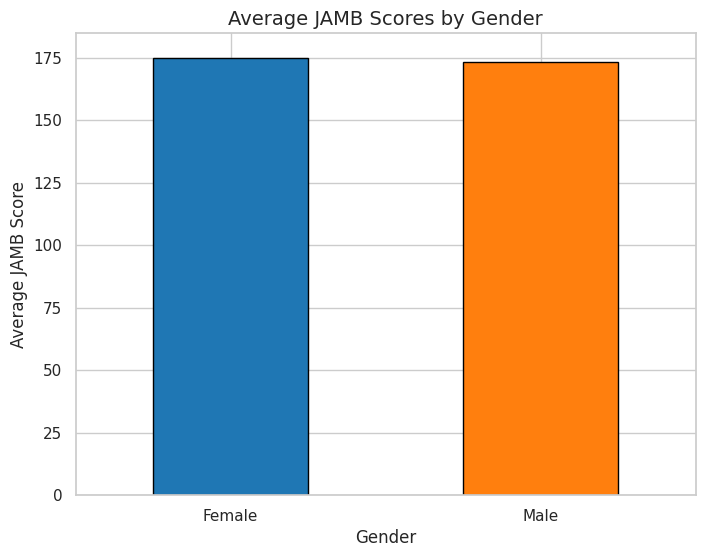

,JAMB_Score
Gender,
Female,174.763241
Male,173.369231


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data= pd.read_csv("/content/drive/My Drive/Temp Tugas/jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Configure plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=data, x="Gender", y="JAMB_Score", jitter=True, palette="viridis")

# Add labels and title
plt.title("Relationship Between Gender and JAMB Scores", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("JAMB Score", fontsize=12)

# Display the plot
plt.show()

print("\n\n\n\n")

# Calculate mean JAMB scores by gender
mean_scores = data.groupby("Gender")["JAMB_Score"].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind="bar", color=["#1f77b4", "#ff7f0e"], edgecolor="black")

# Add labels and title
plt.title("Average JAMB Scores by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average JAMB Score", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, mean_scores.max() + 10)

# Display the bar chart
plt.show()

# Display the calculated averages
mean_scores


GRAFIK PARENT INVOLVEMENT

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-7-492b5c67e526>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Parent_Involvement", y="JAMB_Score", jitter=True, palette="viridis")


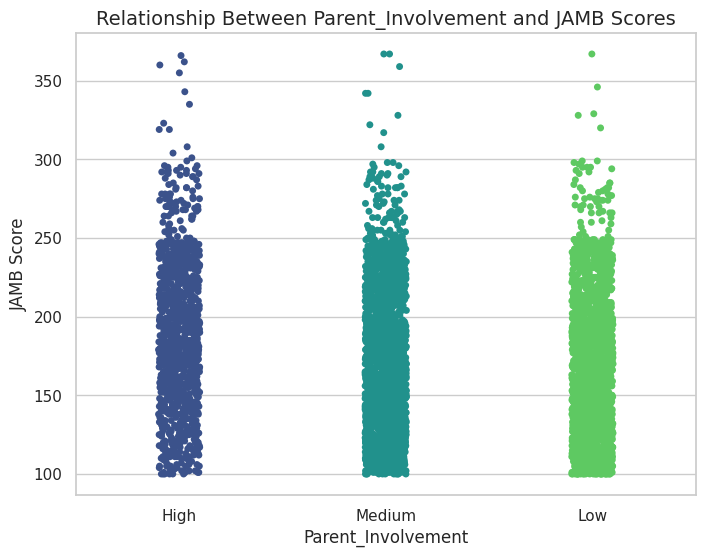

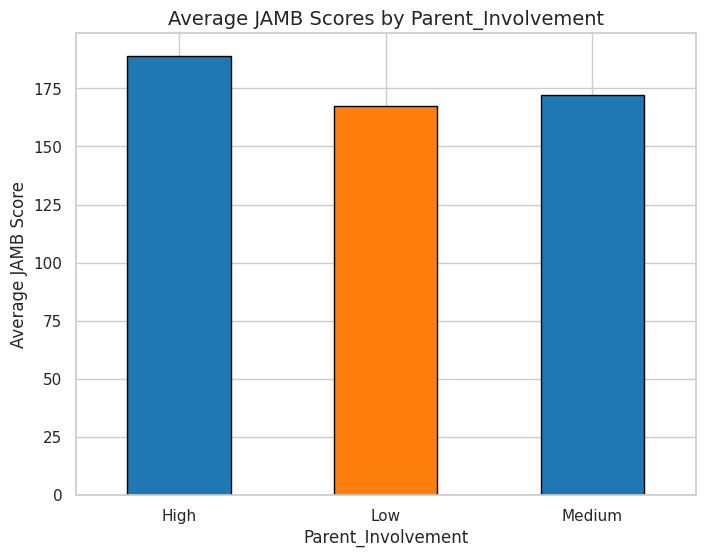

,JAMB_Score
Parent_Involvement,
High,188.826283
Low,167.253063
Medium,172.292744


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data= pd.read_csv("/content/drive/My Drive/Temp Tugas/jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Configure plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=data, x="Parent_Involvement", y="JAMB_Score", jitter=True, palette="viridis")

# Add labels and title
plt.title("Relationship Between Parent_Involvement and JAMB Scores", fontsize=14)
plt.xlabel("Parent_Involvement", fontsize=12)
plt.ylabel("JAMB Score", fontsize=12)

# Display the plot
plt.show()

print("\n\n\n\n")

# Calculate mean JAMB scores by gender
mean_scores = data.groupby("Parent_Involvement")["JAMB_Score"].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind="bar", color=["#1f77b4", "#ff7f0e"], edgecolor="black")

# Add labels and title
plt.title("Average JAMB Scores by Parent_Involvement", fontsize=14)
plt.xlabel("Parent_Involvement", fontsize=12)
plt.ylabel("Average JAMB Score", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, mean_scores.max() + 10)

# Display the bar chart
plt.show()

# Display the calculated averages
mean_scores

GRAFIK SOCIOECONOMIC STATUS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-b70951cc4344>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Socioeconomic_Status", y="JAMB_Score", jitter=True, palette="viridis")


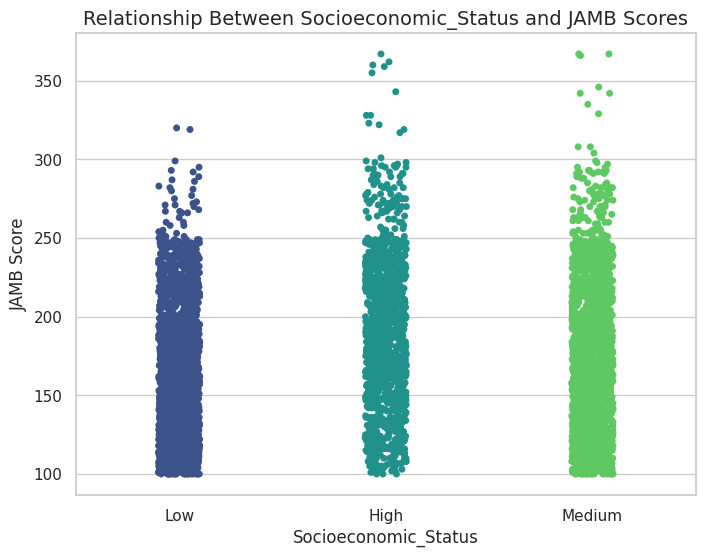

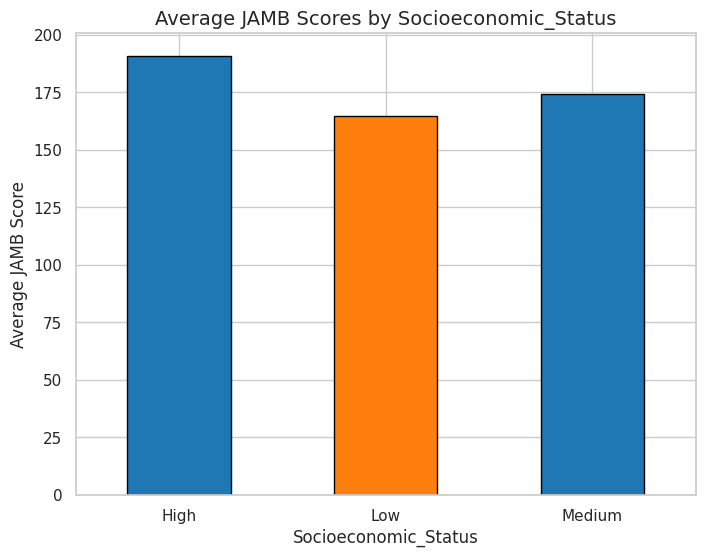

,JAMB_Score
Socioeconomic_Status,
High,190.744917
Low,164.772424
Medium,174.131164


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

data= pd.read_csv("/content/drive/My Drive/Temp Tugas/jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Configure plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=data, x="Socioeconomic_Status", y="JAMB_Score", jitter=True, palette="viridis")

# Add labels and title
plt.title("Relationship Between Socioeconomic_Status and JAMB Scores", fontsize=14)
plt.xlabel("Socioeconomic_Status", fontsize=12)
plt.ylabel("JAMB Score", fontsize=12)

# Display the plot
plt.show()

print("\n\n\n\n")

# Calculate mean JAMB scores by gender
mean_scores = data.groupby("Socioeconomic_Status")["JAMB_Score"].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind="bar", color=["#1f77b4", "#ff7f0e"], edgecolor="black")

# Add labels and title
plt.title("Average JAMB Scores by Socioeconomic_Status", fontsize=14)
plt.xlabel("Socioeconomic_Status", fontsize=12)
plt.ylabel("Average JAMB Score", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, mean_scores.max() + 10)

# Display the bar chart
plt.show()

# Display the calculated averages
mean_scores


GRAFIK PARENT EDUCATION LEVEL

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-6ae9a53c7a22>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Parent_Education_Level", y="JAMB_Score", jitter=True, palette="viridis")


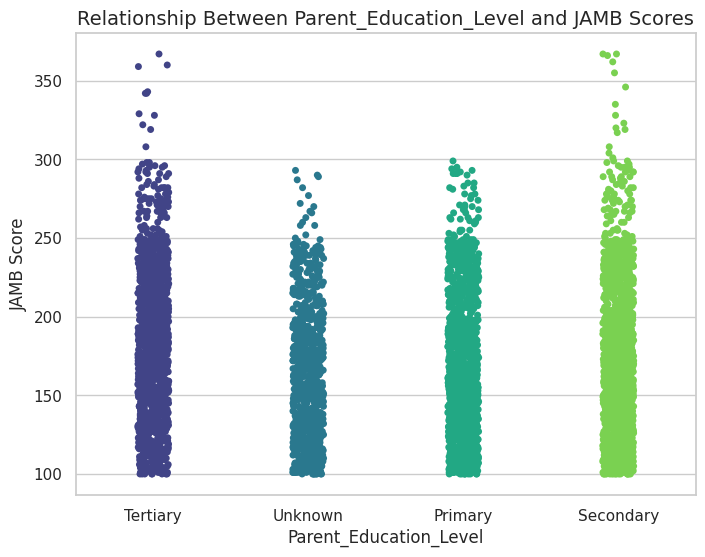

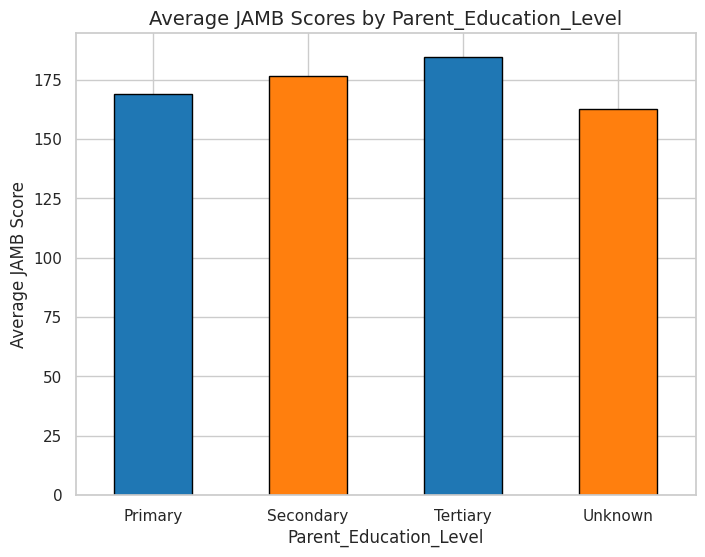

,JAMB_Score
Parent_Education_Level,
Primary,169.112360
Secondary,176.573265
Tertiary,184.738095
Unknown,162.569024


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data= pd.read_csv("/content/drive/My Drive/Temp Tugas/jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Configure plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=data, x="Parent_Education_Level", y="JAMB_Score", jitter=True, palette="viridis")

# Add labels and title
plt.title("Relationship Between Parent_Education_Level and JAMB Scores", fontsize=14)
plt.xlabel("Parent_Education_Level", fontsize=12)
plt.ylabel("JAMB Score", fontsize=12)

# Display the plot
plt.show()

print("\n\n\n\n")

# Calculate mean JAMB scores by gender
mean_scores = data.groupby("Parent_Education_Level")["JAMB_Score"].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind="bar", color=["#1f77b4", "#ff7f0e"], edgecolor="black")

# Add labels and title
plt.title("Average JAMB Scores by Parent_Education_Level", fontsize=14)
plt.xlabel("Parent_Education_Level", fontsize=12)
plt.ylabel("Average JAMB Score", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, mean_scores.max() + 10)

# Display the bar chart
plt.show()

# Display the calculated averages
mean_scores
